In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%cd calentamiento/

/home/cesar/Documents/practica_cursos/code/python/pandas/calentamiento


In [4]:
df_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df_temp.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
128483,1989-01-01,1.653,0.379,Croatia
406666,1935-02-01,25.234,0.512,Papua New Guinea
506577,1842-04-01,0.562,2.251,Sweden
571432,1976-07-01,26.188,0.999,Western Sahara
572302,1911-04-01,26.721,0.900,Yemen


In [5]:
df_temp.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [6]:
df_temp['year'] = pd.to_datetime(df_temp['dt'])

In [7]:
df_temp.dtypes

dt                                       object
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
Country                                  object
year                             datetime64[ns]
dtype: object

In [8]:
idx = df_temp['year'] > pd.to_datetime('1970-01-01') #Tomo solo las fechas que comienzan en 1970
df_temp[idx]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [9]:
df_t = df_temp[idx].groupby(['Country',pd.Grouper(key='year',freq='y')]).agg({'AverageTemperature':[np.mean,np.median]})
df_t

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

<AxesSubplot:xlabel='year'>

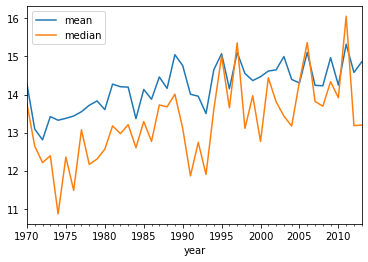

In [10]:
df_t.xs('Spain')['AverageTemperature'].plot()

In [11]:
df_t_med = df_t['AverageTemperature'][['median']].reset_index()

In [12]:
df_t_med.rename(columns={'year':'date','median':'temperature'},inplace=True)

In [13]:
df_t_med['year'] = df_t_med['date'].dt.year
df_t_med

,Country,date,temperature,year
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [14]:
df_pivot = df_t_med.pivot_table(values='temperature',columns='Country',index='year')
df_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
year,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,...,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,...,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,...,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,...,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,...,17.4025,13.2105,25.0760,24.3700,26.1720,21.5755,26.6320,21.6005,21.3255,5.4550
1975,13.5130,24.8045,12.3595,23.0740,26.6510,10.4105,22.4210,26.4780,26.3340,15.1515,...,17.1810,13.3395,24.9790,24.9900,26.2985,20.5175,26.1155,21.8635,21.7910,6.0170
1976,14.1615,24.8225,12.6080,22.2980,26.6155,9.6625,22.1455,26.9825,26.8425,14.3965,...,16.5660,11.3820,25.0590,24.4665,26.6620,20.4625,26.3220,21.6980,21.9880,4.3855
1977,15.6575,25.0345,11.9870,23.5375,26.7085,10.4055,22.6000,27.2010,27.0085,15.9725,...,18.3455,13.8000,25.6165,24.6295,26.8935,22.6755,26.8845,22.1670,22.2910,5.4745
1978,15.2580,24.9135,11.5490,22.5620,26.7250,9.7565,22.7055,27.2320,27.0370,15.3350,...,17.1655,13.2965,25.5600,24.4290,26.9675,21.7730,27.0135,22.1010,22.6210,5.7475


<AxesSubplot:xlabel='year'>

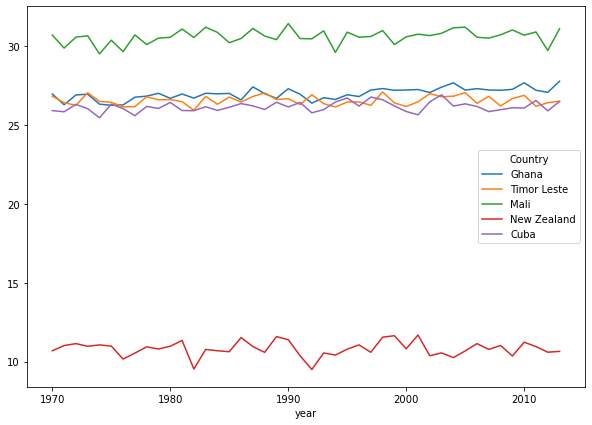

In [15]:
df_pivot.T.sample(5).T.plot(figsize=(10,7))

<AxesSubplot:>

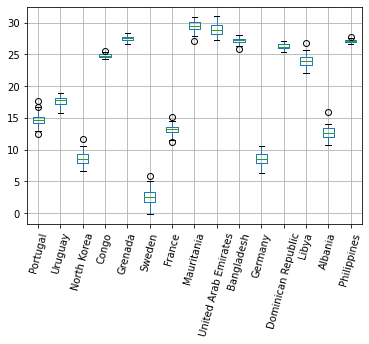

In [16]:
df_pivot.T.sample(15).T.boxplot(rot=75)

In [17]:
%cd calentamiento/

[Errno 2] No such file or directory: 'calentamiento/'
/home/cesar/Documents/practica_cursos/code/python/pandas/calentamiento


In [57]:
df_agri = pd.read_csv('API_AG.LND.AGRI.K2_DS2_en_csv_v2_1927122.csv',header=2)
df_frst = pd.read_csv('API_AG.LND.FRST.K2_DS2_en_csv_v2_1927168.csv',header=2)
df_elc  = pd.read_csv('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_1927784.csv',header=2)
df_co2  = pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1926651.csv',header=2)
df_pop  = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_1976634.csv',header=2)


In [19]:
df_agri

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,20.0,20.0,20.0,20.0,20.0,...,20.000000,20.000000,20.000000,20.000000,20.000000,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,377000.0,377600.0,378100.0,378730.0,378750.0,...,379100.000000,379100.000000,379100.000000,379100.000000,379100.000000,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,571700.0,572000.0,572200.0,572500.0,572700.0,...,589900.000000,591900.000000,591900.000000,591900.000000,591900.000000,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,12320.0,12320.0,12330.0,12300.0,12370.0,...,12013.000488,11873.000488,11742.900391,11743.000488,11816.999512,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,260.0,260.0,260.0,260.0,260.0,...,187.600002,188.099995,188.099995,188.099995,187.800007,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,233370.0,233480.0,233600.0,233700.0,233800.0,...,235500.000000,235460.000000,235460.000000,235460.000000,235460.000000,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,1013350.0,1001350.0,989950.0,977500.0,966100.0,...,968410.000000,968410.000000,968410.000000,968410.000000,968410.000000,NaN,NaN,NaN,NaN,NaN
262,Zambia,ZMB,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,193070.0,193600.0,194040.0,194590.0,195130.0,...,238360.000000,237360.000000,238360.000000,238360.000000,238360.000000,NaN,NaN,NaN,NaN,NaN


In [55]:
def format(dt,name='Agriculture_km2'):
    l_year = list(map(str,range(1970,2017)))
    columns = ['Country Name','Country Code']+l_year
    dt = dt[columns]
    dt = dt.melt(id_vars=columns[:2],var_name=['year'],value_name=name).rename(
        columns={
    'Country Name':'Country',
    'Country Code':'name'}
    )
    return dt

In [58]:
df_agri =format(df_agri)
df_co2 =format(df_co2,name='Co2_kt')
df_elc =format(df_elc,name='Electric_keh')
df_pop =format(df_pop,name='Population')
df_frst =format(df_frst,name='Forest_km2')
df_agri

,Country,name,year,Agriculture_km2
0,Aruba,ABW,1970,20.0
1,Afghanistan,AFG,1970,380060.0
2,Angola,AGO,1970,574000.0
3,Albania,ALB,1970,12300.0
4,Andorra,AND,1970,260.0
...,...,...,...,...
12403,Kosovo,XKX,2016,NaN
12404,"Yemen, Rep.",YEM,2016,235460.0
12405,South Africa,ZAF,2016,968410.0
12406,Zambia,ZMB,2016,238360.0


In [60]:
df_t_med = df_t_med.loc[:,['Country','temperature','year']]

In [59]:
df_agri['year'] = df_agri['year'].astype(int)
df_co2['year'] = df_co2['year'].astype(int)
df_elc['year'] = df_elc['year'].astype(int)
df_frst['year'] = df_frst['year'].astype(int)
df_pop['year'] = df_pop['year'].astype(int)

In [61]:
df_merge = pd.merge(df_t_med,df_agri,how='inner',on=['Country','year'])
df_merge

,Country,temperature,year,name,Agriculture_km2
0,Afghanistan,16.1990,1970,AFG,380060.0
1,Afghanistan,14.9340,1971,AFG,380360.0
2,Afghanistan,13.8725,1972,AFG,380460.0
3,Afghanistan,14.9130,1973,AFG,380480.0
4,Afghanistan,13.6160,1974,AFG,380480.0
...,...,...,...,...,...
7387,Zimbabwe,22.4860,2009,ZWE,163000.0
7388,Zimbabwe,23.3040,2010,ZWE,162000.0
7389,Zimbabwe,22.9420,2011,ZWE,164000.0
7390,Zimbabwe,23.0455,2012,ZWE,162000.0


In [53]:
def merge_df(df1,df_list):
    df_merge = pd.merge(df1,df_list[0],how='inner',on=['Country','year','name'])
    for i in df_list[1:]:
        df_merge = pd.merge(df_merge,i,how='inner',on=['Country','year','name'])
    return df_merge

In [68]:
df_clima = merge_df(df_merge,[df_co2,df_elc,df_pop,df_frst])
df_clima

,Country,temperature,year,name,Agriculture_km2,Co2_kt,Electric_keh,Population,Forest_km2
0,Afghanistan,16.20,1970,AFG,"380,060.00","1,672.15",nan,"11,173,642.00",nan
1,Afghanistan,14.93,1971,AFG,"380,360.00","1,895.84",nan,"11,475,445.00",nan
2,Afghanistan,13.87,1972,AFG,"380,460.00","1,532.81",nan,"11,791,215.00",nan
3,Afghanistan,14.91,1973,AFG,"380,480.00","1,639.15",nan,"12,108,963.00",nan
4,Afghanistan,13.62,1974,AFG,"380,480.00","1,917.84",nan,"12,412,950.00",nan
...,...,...,...,...,...,...,...,...,...
7387,Zimbabwe,22.49,2009,ZWE,"163,000.00","5,603.18",585.46,"12,526,968.00","159,510.00"
7388,Zimbabwe,23.30,2010,ZWE,"162,000.00","7,803.38",606.64,"12,697,723.00","156,240.00"
7389,Zimbabwe,22.94,2011,ZWE,"164,000.00","9,622.21",636.25,"12,894,316.00","153,116.00"
7390,Zimbabwe,23.05,2012,ZWE,"162,000.00","7,873.05",608.76,"13,115,131.00","149,992.00"


In [66]:
pd.options.display.float_format = '{:,.2f}'.format

In [84]:
df_clima.groupby('Country')['Co2_kt'].sum().sort_values(ascending=False) #La suma de co2 que han producido los paises

Country
North America              241,326,205.09
United States              220,850,923.87
China                      154,223,954.08
Japan                       46,743,854.06
India                       34,930,331.20
                                ...      
Northern Mariana Islands             0.00
American Samoa                       0.00
San Marino                           0.00
Guam                                 0.00
Puerto Rico                          0.00
Name: Co2_kt, Length: 168, dtype: float64

In [91]:
df_top = df_clima.groupby('Country')['Co2_kt'].median().sort_values(ascending=False)
df_top.head(10).index

Index(['North America', 'United States', 'China', 'Japan', 'Germany', 'India',
       'United Kingdom', 'Canada', 'Italy', 'France'],
      dtype='object', name='Country')

In [99]:
df_max_co2 = df_clima[df_clima['Country'].isin(['United States', 'China', 'Japan', 'Germany', 'India',
       'United Kingdom', 'Canada', 'Italy', 'France'])]

In [100]:
df_max_co2

,Country,temperature,year,name,Agriculture_km2,Co2_kt,Electric_keh,Population,Forest_km2
1276,Canada,-1.63,1970,CAN,"690,210.00","341,485.71","8,962.20","21,324,000.00",nan
1277,Canada,-3.48,1971,CAN,"686,610.00","352,607.72","9,166.68","21,962,032.00",nan
1278,Canada,-6.68,1972,CAN,"686,130.00","381,136.98","9,803.56","22,218,463.00",nan
1279,Canada,-3.66,1973,CAN,"685,660.00","381,621.02","10,241.92","22,491,777.00",nan
1280,Canada,-6.04,1974,CAN,"685,190.00","389,970.78","10,804.60","22,807,969.00",nan
...,...,...,...,...,...,...,...,...,...
7167,United States,8.35,2009,USA,"4,099,606.88","5,263,505.46","12,913.71","306,771,529.00","3,079,274.06"
7168,United States,10.23,2010,USA,"4,084,261.88","5,395,532.12","13,395.14","309,321,666.00","3,087,200.00"
7169,United States,9.54,2011,USA,"4,046,693.12","5,270,047.38","13,247.01","311,556,874.00","3,089,950.00"
7170,United States,9.94,2012,USA,"4,087,065.00","5,081,999.96","12,966.12","313,830,990.00","3,092,700.00"


<AxesSubplot:xlabel='Population', ylabel='Agriculture_km2'>

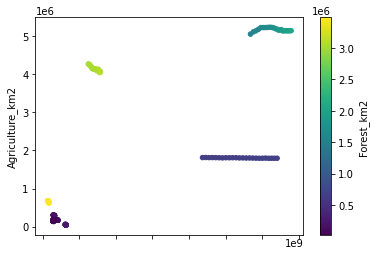

In [109]:
df_max_co2.set_index('Country').plot.scatter(
    x='Population',
    y='Agriculture_km2',
    c='Forest_km2',
    colormap='viridis')

In [110]:
df_clima.corr()

,temperature,year,Agriculture_km2,Co2_kt,Electric_keh,Population,Forest_km2
temperature,1.00,0.04,-0.15,-0.23,-0.49,-0.06,-0.15
year,0.04,1.00,-0.00,0.04,0.17,0.05,-0.00
Agriculture_km2,-0.15,-0.00,1.00,0.76,0.13,0.62,0.72
Co2_kt,-0.23,0.04,0.76,1.00,0.22,0.58,0.67
Electric_keh,-0.49,0.17,0.13,0.22,1.00,-0.04,0.19
Population,-0.06,0.05,0.62,0.58,-0.04,1.00,0.38
Forest_km2,-0.15,-0.00,0.72,0.67,0.19,0.38,1.00


In [111]:
import seaborn as sns

<AxesSubplot:>

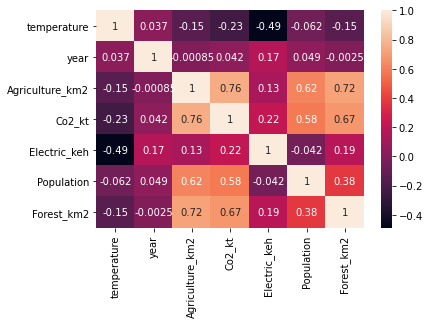

In [113]:
sns.heatmap(df_clima.corr(),annot=True)

In [119]:
df_m = df_clima.groupby('year').median()
df_m.head()

,temperature,Agriculture_km2,Co2_kt,Electric_keh,Population,Forest_km2
year,,,,,,
1970,22.90,"38,190.05","3,083.95","3,222.00","3,757,358.00",nan
1971,22.53,"38,960.00","3,410.31",516.38,"3,871,439.00",nan
1972,22.65,"39,240.00","3,556.99",559.82,"3,933,004.00",nan
1973,22.99,"39,550.00","4,237.22",587.91,"3,964,270.00",nan
1974,22.17,"39,770.00","4,273.89",611.19,"4,060,260.00",nan


In [122]:
df_m.reset_index(inplace=True)

<AxesSubplot:>

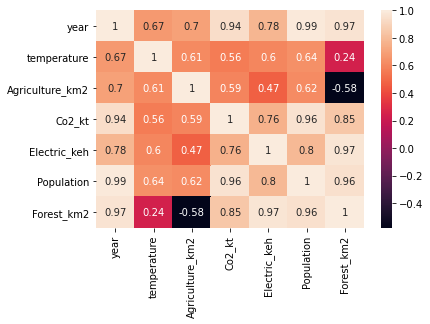

In [131]:
sns.heatmap(df_m.corr(),annot=True)

In [133]:
from pandas.plotting import scatter_matrix

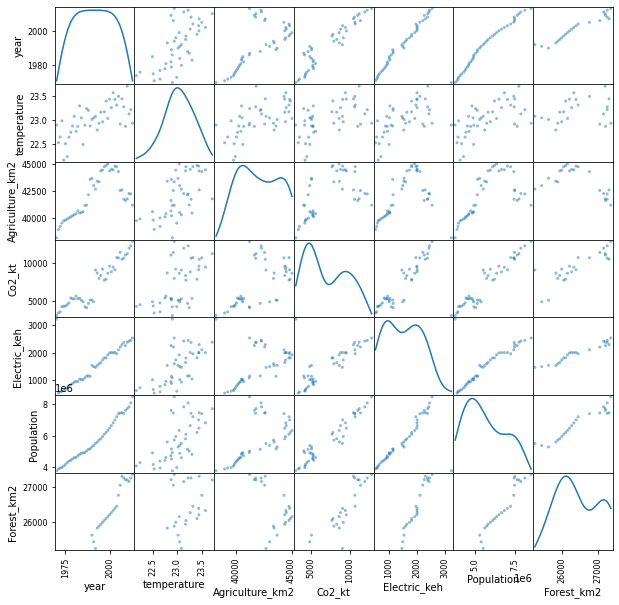

In [147]:
scatter_matrix(df_m,diagonal='kde',figsize=(10,10))
plt.show()

# Gráfico de cordenadas paralelas

In [148]:
from pandas.plotting import parallel_coordinates 

In [157]:
df_clima.head()

,Country,temperature,year,name,Agriculture_km2,Co2_kt,Electric_keh,Population,Forest_km2
0,Afghanistan,16.20,1970,AFG,"380,060.00","1,672.15",nan,"11,173,642.00",nan
1,Afghanistan,14.93,1971,AFG,"380,360.00","1,895.84",nan,"11,475,445.00",nan
2,Afghanistan,13.87,1972,AFG,"380,460.00","1,532.81",nan,"11,791,215.00",nan
3,Afghanistan,14.91,1973,AFG,"380,480.00","1,639.15",nan,"12,108,963.00",nan
4,Afghanistan,13.62,1974,AFG,"380,480.00","1,917.84",nan,"12,412,950.00",nan


In [244]:
df_gp = df_clima[
    df_clima['Country'].isin(['Colombia','Spain','United States','China','Mexico'])
][['Country',
 'temperature',
 'Agriculture_km2',
 'Co2_kt',
 'Electric_keh',
 'Forest_km2']]

In [222]:
df_gp

,Country,temperature,year,Agriculture_km2,Co2_kt,Electric_keh,Population,Forest_km2
1496,China,7.75,1970,"3,746,000.00","771,617.47",nan,"818,315,000.00",nan
1497,China,7.96,1971,"3,792,500.00","876,633.02",151.99,"841,105,000.00",nan
1498,China,7.44,1972,"3,838,700.00","931,575.68",163.91,"862,030,000.00",nan
1499,China,8.13,1973,"3,894,800.00","968,542.71",175.93,"881,940,000.00",nan
1500,China,8.25,1974,"3,961,000.00","988,014.48",174.23,"900,350,000.00",nan
...,...,...,...,...,...,...,...,...
7167,United States,8.35,2009,"4,099,606.88","5,263,505.46","12,913.71","306,771,529.00","3,079,274.06"
7168,United States,10.23,2010,"4,084,261.88","5,395,532.12","13,395.14","309,321,666.00","3,087,200.00"
7169,United States,9.54,2011,"4,046,693.12","5,270,047.38","13,247.01","311,556,874.00","3,089,950.00"
7170,United States,9.94,2012,"4,087,065.00","5,081,999.96","12,966.12","313,830,990.00","3,092,700.00"


In [223]:
df_gp.dtypes

Country             object
temperature        float64
year                 int64
Agriculture_km2    float64
Co2_kt             float64
Electric_keh       float64
Population         float64
Forest_km2         float64
dtype: object

In [181]:
df_gp

['Country',
 'temperature',
 'year',
 'Agriculture_km2',
 'Co2_kt',
 'Electric_keh',
 'Population',
 'Forest_km2']

<AxesSubplot:>

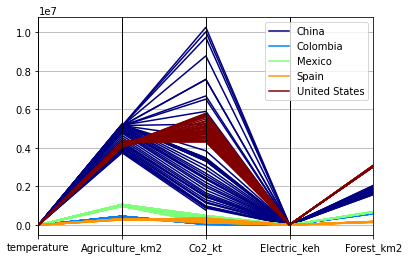

In [247]:
parallel_coordinates(df_gp,'Country',colormap='jet')
plt.figure(figsize=(10,7))
plt.show()

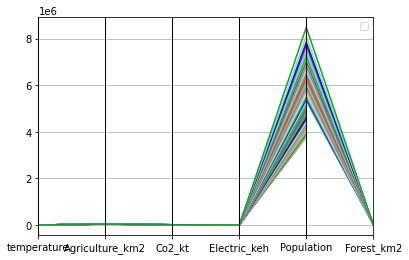

In [248]:
parallel_coordinates(df_m,'year')
plt.legend('')
plt.show()

In [251]:
df_tes = pd.DataFrame({
    'edad' :     [ 10, 9, 13, 14, 12, 11, 12],
    'cm' : [ 115, 110, 130, 155, 125, 120, 125],
    'pais' :    [ 'co', 'mx', 'co', 'mx', 'mx', 'ch', 'ch'],
    'genero' :  [ 'F', 'M', 'M', 'M', 'F', 'F', 'F'],
    'Q1' : [ 5, 10, 8, np.nan, 7, 8, 3],
    'Q2' : [ 7, 9, 9, 8, 8, 8, 9.]
}, index = ['Ana','Benito','Camilo','Daniel','Erika','Paola','Gabriela'])

print(df_tes.iloc[[4],[2]])

      pais
Erika   mx


In [252]:
df_test = pd.DataFrame({
    'edad' :     [ 10, 9, 13, 14, 12, 11, 12],
    'cm' : [ 115, 110, 130, 155, 125, 120, 125],
    'pais' :    [ 'co', 'mx', 'co', 'mx', 'mx', 'ch', 'ch'],
    'genero' :  [ 'F', 'M', 'M', 'M', 'F', 'F', 'F'],
    'Q1' : [ 5, 10, 8, np.nan, 7, 8, 3],
    'Q2' : [ 7, 9, 9, 8, 8, 8, 9.]
}, index = ['Ana','Benito','Camilo','Daniel','Erika','Paola','Gabriela']) 

In [253]:
df_test.groupby('genero').mean()

,edad,cm,Q1,Q2
genero,,,,
F,11.25,121.25,5.75,8.00
M,12.00,131.67,9.00,8.67


In [256]:
df_test.describe(include='all')

,edad,cm,pais,genero,Q1,Q2
count,7.00,7.00,7,7,6.00,7.00
unique,nan,nan,3,2,nan,nan
top,nan,nan,mx,F,nan,nan
freq,nan,nan,3,4,nan,nan
mean,11.57,125.71,NaN,NaN,6.83,8.29
std,1.72,14.56,NaN,NaN,2.48,0.76
min,9.00,110.00,NaN,NaN,3.00,7.00
25%,10.50,117.50,NaN,NaN,5.50,8.00
50%,12.00,125.00,NaN,NaN,7.50,8.00
75%,12.50,127.50,NaN,NaN,8.00,9.00


In [263]:
np.array([10,8,5,0]).dot(np.array([0,1,6,12]))

38